In [1]:
from google.colab import drive

drive.mount('/content/drive') # drive mounted on colab

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/content/drive/MyDrive/banknote_assignment/BankNote_Authentication.csv') # file reading from drive
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
data.shape

(1372, 5)

In [11]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [91]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


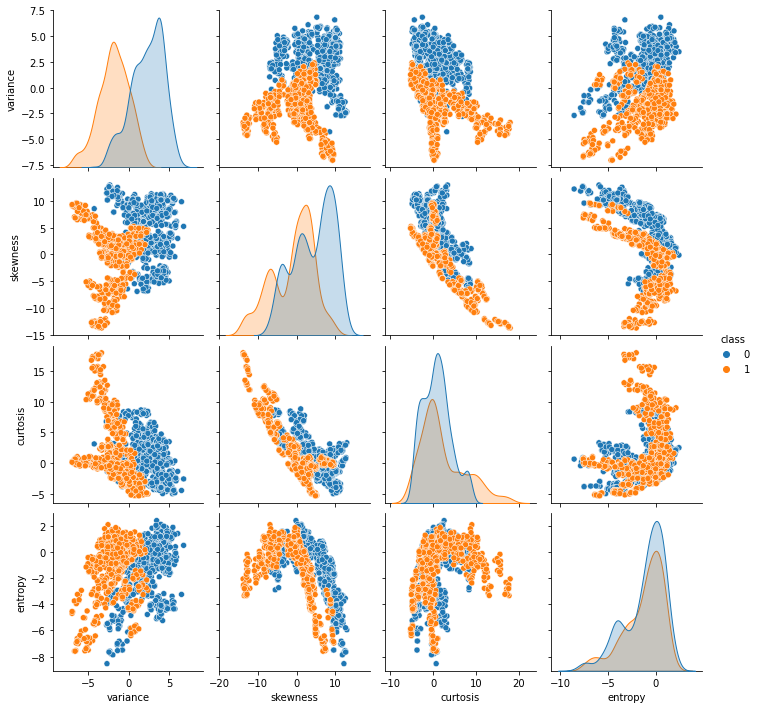

In [16]:
sns.pairplot(data, hue='class') # pairplot of data distribution

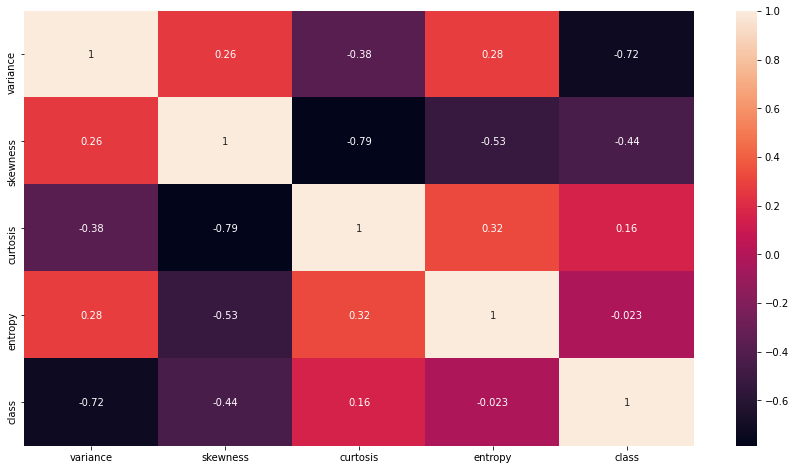

In [21]:
corr = data.corr() # correlation of the given data
plt.subplots(figsize=(15, 8))
sns.heatmap(corr,annot=True)

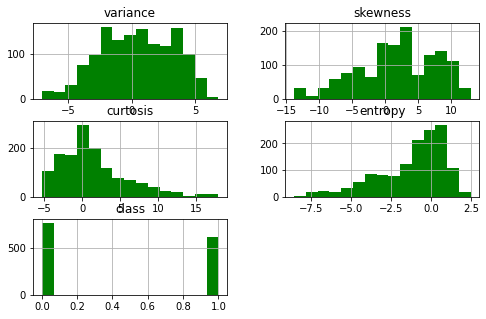

In [129]:
data.hist(figsize=(8,5),bins = 15,color='green') # distribution of all the features from given data
plt.show()

In [25]:
X = data.drop(['class'], axis=1)  
y = data['class']   

In [ ]:
X.head(5)

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [107]:
n_features = X.shape[1]

# define model
model = Sequential()
#using one hidden layer with 10 nodes and 1 output layer 
model.add(Dense(units = 10, kernel_initializer = 'he_normal', activation = 'relu', input_dim = n_features))
#we use sigmoid function as formula is y = c + mx = k0 + k1*x
model.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'sigmoid'))
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train, y_train, batch_size = 20, epochs = 100,verbose = 0,validation_data=(X_test,y_test))


In [136]:

loss, Accuracy = model.evaluate(X_train, y_train, batch_size=20)
print('\nTraining Loss:', loss)
print('Training accuracy:', Accuracy)
print("\n")
loss1, Accuracy1 = model.evaluate(X_test, y_test, batch_size=20)
print('\nTesting Loss:', loss1)
print('Testing accuracy:', Accuracy1)

46/46 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000

Training Loss: 0.0014953564386814833
Training accuracy: 1.0


23/23 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000

Testing Loss: 0.0017920671962201595
Testing accuracy: 1.0


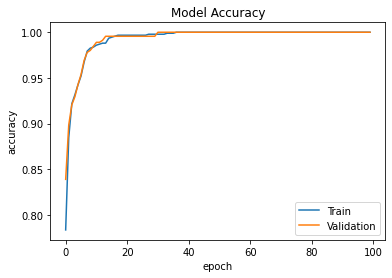

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()


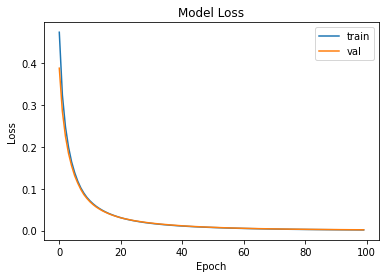

In [139]:

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Text(0, 0.5, 'epoch')

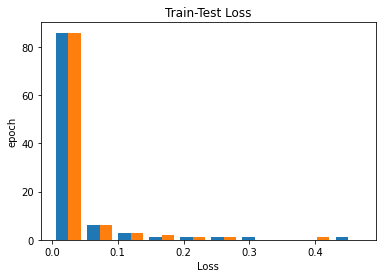

In [147]:
# plot of the loss vs. epochs
plt.hist([history.history['loss'],history.history['val_loss']])
plt.title('Train-Test Loss')
plt.xlabel('Loss')
plt.ylabel('epoch')

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)



array([[237,   0],
       [  0, 216]])

In [89]:
from sklearn.metrics import classification_report

# y_prediction based on test set which are > 0.1

y_pred = model.predict(X_test)
y_pred = (y_pred>0.1)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       237
           1       0.98      1.00      0.99       216

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [90]:
# y_prediction based on test set which are > 0.2

y_pred = model.predict(X_test)
y_pred = (y_pred>0.2)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       216

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


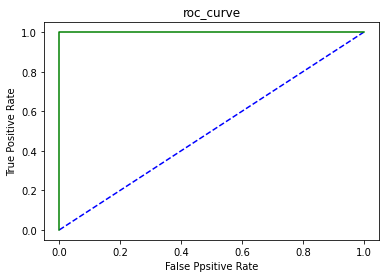

In [148]:
from sklearn.metrics import roc_curve
y_pred_n = model.predict_proba(X_test)
a, b, thresholds = roc_curve(y_test, y_pred_n)
plt.plot([0,1],[0,1],'k--',color='blue')
plt.plot(a, b, label='ANN',color='green')
plt.xlabel('False Ppsitive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve')
plt.show()
